# Tutorial #1

第一弾チュートリアルへようこそ。このチュートリアルでは今回の課題の整理と使えるデータの確認をしていきます。

## Table Of Contents

* Profiling を作ろう
*  テストデータと学習データを知ろう
* 波形データを見よう
* 波形データを特徴にしてみよう

## 参考

* Fast EDA of all data: https://www.guruguru.ml/competitions/10/discussions/9a6f2572-a9a3-41cf-b668-f4809c9eff75
* EDA_各特徴量に対するtarget0,1の分布: https://www.guruguru.ml/competitions/10/discussions/82e08083-3b0c-4041-91fc-84981c715af6
* [EDA] params3の高いデータ/低いデータを100件ずつ見える化: https://www.guruguru.ml/competitions/10/discussions/b66cfa35-162c-4701-9abd-1127d58c7656
* Visualize .dat data: https://www.guruguru.ml/competitions/10/discussions/8b8294bd-0a9b-439e-a782-efa61765d7ee

## Requirements

* seaborn
* scikit-learn
* matplotlib
* numpy
* pandas
* matplotlib-venn
* pandas-profiling

In [1]:
import os

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib_venn import venn2
from pandas_profiling import ProfileReport

# 好みのスタイル
sns.set_style('whitegrid')

In [2]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
fitting_df = pd.read_csv('../data/fitting.csv')

train_df = pd.merge(train_df, fitting_df, on='spectrum_id', how='left')
test_df = pd.merge(test_df, fitting_df, on='spectrum_id', how='left')

In [3]:
train_df.head()

spectrum_id         spectrum_filename               chip_id  \
0  000da4633378740f1ee8  b2e223339f4abce9b400.dat  79ad4647da6de6425abf   
1  000ed1a5a9fe0ad2b7dd  e2f150a503244145e7ce.dat  79ad4647da6de6425abf   
2  0016e3322c4ce0700f9a  3d58b7ccaee157979cf0.dat  c695a1e61e002b34e556   
3  00256bd0f8c6cf5f59c8  ed3641184d3b7c0ae703.dat  c695a1e61e002b34e556   
4  003483ee5ae313d37590  4c63418d39f86dfab9bb.dat  c695a1e61e002b34e556   

   exc_wl  layout_a  layout_x  layout_y      pos_x  target     params0  \
0     850         2        36       140  1313.0810       0   30.808589   
1     780         3         0       168   159.4150       0   91.300897   
2     780         1        34        29  -610.7688       0  106.642946   
3     780         2        32       139  1214.6180       0  306.933674   
4     780         0        45        85  -257.6161       0   46.133256   

        params1      params2   params3       params4      params5    params6  \
0  5.811802e+02  1037.714752  1.531423  22469.651641  1032.317268   8.295610   
1  1.740582e+04  1080.510452  4.766233  33257.123175  1077.468855   8.018225   
2  1.000000e-10  1119.464438  2.000000  42579.867913  1378.883338  11.687417   
3  1.099486e+04  1139.855067  5.198692  39349.741703  1145.212849   9.445029   
4  2.227622e+04  1120.918337  5.668012  31054.928673  1117.107782   7.658710   

         rms          beta  
0  10.028668  2.521298e-02  
1   7.948485  3.435612e-01  
2  10.739859  2.348528e-15  
3  10.379948  2.183921e-01  
4   8.316550  4.176962e-01

In [4]:
test_df.head()

spectrum_id         spectrum_filename               chip_id  \
0  000c50e603636dee33c7  fe0fb0a5d966d574c98b.dat  a948b8cdcd7957eb5c31   
1  000cba4c60cc418502e8  f1a2e526d2fbeadf20ca.dat  3c2948d0a755e5ff99f6   
2  0016566cc4324433f909  a9c9daa6e724bda94190.dat  3c2948d0a755e5ff99f6   
3  001d350c22eb0a7bb876  02559998e0cd35810729.dat  3c2948d0a755e5ff99f6   
4  002b39505ff347dca818  fe70889bcb853adf1d05.dat  3c2948d0a755e5ff99f6   

   exc_wl  layout_a  layout_x  layout_y     pos_x      params0       params1  \
0     780         3         0       184  189.6556    -0.200403  26861.147936   
1     780         1        45       188 -256.4733   308.514851  26886.386343   
2     850         1        44       135 -291.3372    48.078481  18270.435476   
3     850         1        26       141 -863.9271   179.052601   7646.843080   
4     780         3        18        64  737.2772 -7414.835134  77855.568427   

       params2    params3       params4      params5       params6        rms  \
0  1377.632654  12.273408  4.999833e-13  1000.000005  44730.274402   7.981621   
1  1277.465325   9.919383  5.096237e-13  1001.383038  26753.813871  26.110692   
2  1497.343413  10.583315  1.037360e+04  1490.660842     11.663950   9.727451   
3  1498.851981   5.851480  1.899570e+04  1491.204735     13.616758  10.317538   
4  1172.532492  10.794408  2.827082e+07  1179.643483   2400.602334   9.761143   

       beta  
0  1.000000  
1  1.000000  
2  0.637844  
3  0.287016  
4  0.002746

## Profiling を作ろう

pandas profiling というツールがあります。これを使うと table に入った情報の強力なレポートを作成してくれます。

In [5]:
report = ProfileReport(pd.concat([train_df, test_df], axis=0, ignore_index=True, sort=True))

In [6]:
report.to_file('./report.html')

## テストデータと学習データを知ろう

### カテゴリ系のカラム・テストデータとの重なりチェック

カテゴリのカラムでテストデータ・学習データでかぶっていないものは要注意です。

より一般的に言うとテストデータと学習データの分布が異なるもの一般が要注意な特徴量になります。分布が違いすぎるというのは即ち **学習していない状況で予測をする** ことになります。これによって学習データで見積もった予測性能とテストデータでの予測性能が乖離してしまいます。
具体的には手元のスコアと submit したスコアがずれます。

実務的にいうと集めたデータでモデルを作ってデプロイしたら全然手元の学習スコアが再現されず悲しいことになる、という状況ですね。😢

In [7]:
def plot_venn(train_df, test_df, column, ax):
    venn2(subsets=(set(train_df[column]), set(test_df[column])), set_labels=('train', 'test'), ax=ax)
    ax.set_title(column)
    return ax

In [8]:
def flatten(axes):
    return [x for a in axes for x in a]

In [9]:
columns = [
    'spectrum_id', 'spectrum_filename', 'chip_id', 'layout_a'
]

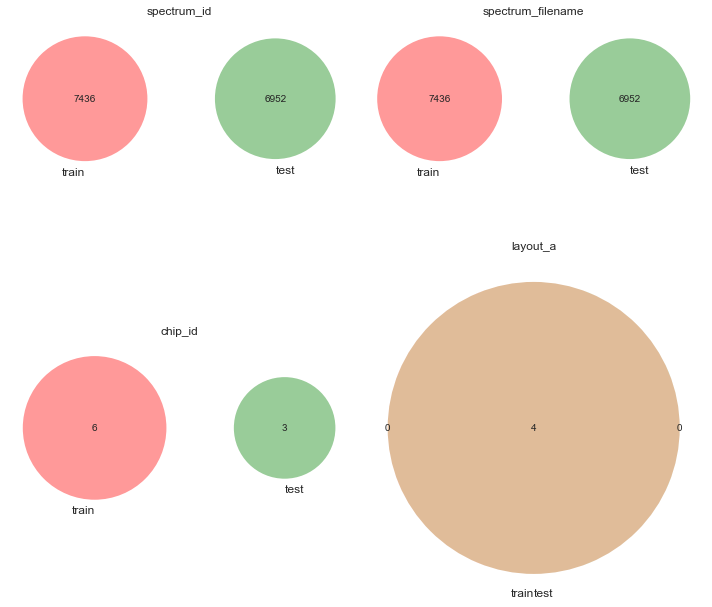

In [10]:
fig, axes = plt.subplots(figsize=(10, 10), ncols=2, nrows=2)

# ncols, nrows を指定すると二次元配列になるので flatten する
for ax, col in zip(flatten(axes), columns):
    plot_venn(train_df, test_df, column=col, ax=ax)
fig.tight_layout()

In [11]:
whole_df = pd.concat([train_df, test_df], axis=0, ignore_index=True, sort=True)
whole_df['is_train'] = [True] * len(train_df) + [False] * len(test_df)

数値のカラムに対しては distribution plot が見やすいです。数値の選択には `select_dtypes` を使います。これは渡された type を持つカラムだけを取ってくる操作を行なうものです。

* https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html

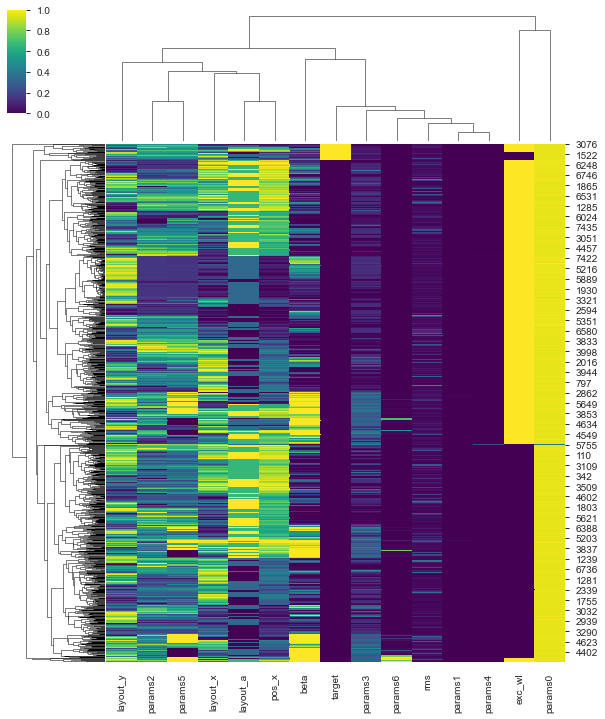

In [12]:
_df = train_df.select_dtypes(['float', 'int'])

# 全部出すと大変なので一部だけサンプリング
sns.clustermap(_df.sample(1000), standard_scale=1, cmap='viridis', figsize=(10, 12), 
               row_cluster='cosine')

## 波形データ

レコードごとに実際の観測データも紐付いています。開き方は `spectrum_filename` の名前のファイルを `spectrum_raw` のディレクトリの中から探せばOK

In [13]:
def read_spectrum(name):
    path = os.path.join('../data/spectrum_raw/', name)
    
    if not os.path.exists(path):
        raise ValueError(f'{name} is not found at spectrum raw dir {path}')
    
    return pd.read_csv(path, header=None, sep='\t')

In [14]:
data = whole_df['spectrum_filename'].map(read_spectrum)

In [15]:
data[0]

0       1
0    1032.836  1751.0
1    1033.886  1493.0
2    1034.936  1299.0
3    1035.986  1120.0
4    1037.036   900.0
..        ...     ...
507  1560.748   -56.0
508  1561.781    -1.0
509  1562.813   116.0
510  1563.845   -69.0
511  1564.877    28.0

[512 rows x 2 columns]

### とりあえずいろいろ眺める

実際に絵として眺めるのはとても大事です。例えば一旦このすべての波形を画像化して保存、ざざーっと finder などで見てみるのとても良い方法です。ドメイン知識がある専門家はこれを見て判断してるわけですから、おそらく何らかの傾向があるはずです(でもそれをプログラムのロジックにまで落とし込めていないので困っている)。分析する我々もデータに対して詳しくなるって、究極的には自分で見たらこれが結合状態かどうかわかるまで行ければ、positive と思うか negative と思うかの基準のアイディアを思いつきやすいです。

In [16]:
output_dir = './spectrum_figs'
os.makedirs(output_dir, exist_ok=True)

In [17]:
def plot_multiple_images(start: int, length: int):
    fig, axes = plt.subplots(figsize=(20, 20), ncols=8, nrows=length // 8)
    for i, ax in zip(range(start, length), flatten(axes)):
        # 若干 safety にとってくる
        x = data.get(i, None)
        if x is None:
            raise ValueError(f'index={i} is not found at wave data')
            
        ax.plot(x.values[:, 1])
    return fig, ax

(<Figure size 1440x1440 with 64 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x131dbaa58>)

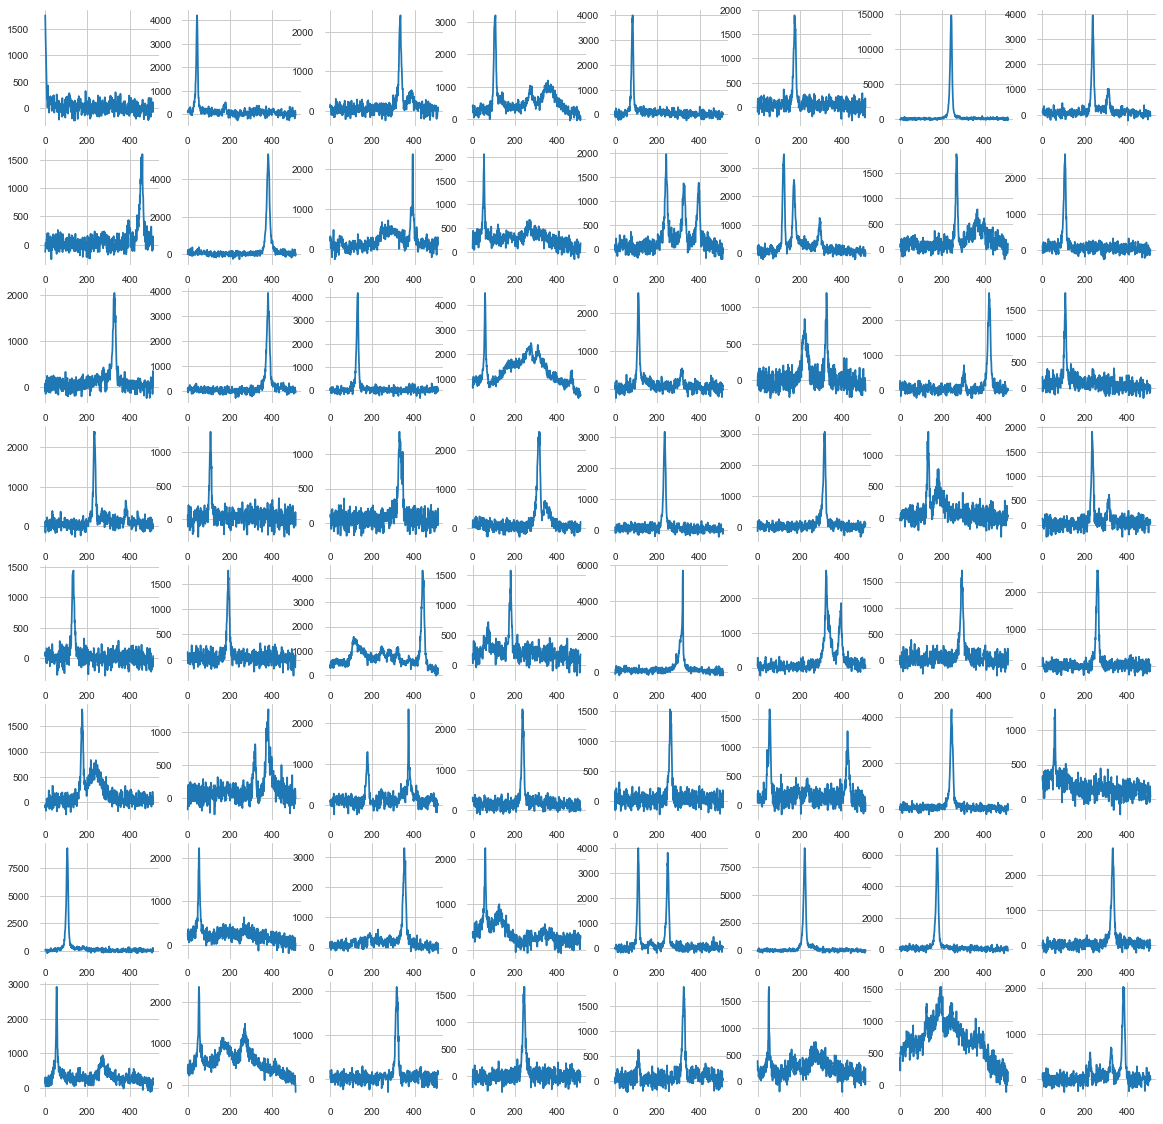

In [18]:
plot_multiple_images(0, 64)

### これをどうやって使う?

波形をそのまま特徴にすることもできます

In [19]:
wave_df = pd.DataFrame()

for k, v in data.items():
    wave_df[k] = v.values[:511, 1] # testが511次元のものがある

In [20]:
# 学習データと同じ 512 次元の数値特徴量とみなせる。
wave_df.shape

(511, 14388)

しかし使うときには注意が必要です。

### GradientBoostingを使う際の注意

Gradient Boosting (XGboost, LightGBM, などなど) は一般的なテーブルデータで用いられる強力な予測モデルですが、今回のこの波形データ特徴量に限って言えば、直接使って良いかどうか疑う必要があります(もちろん問題ない可能性もあります)。なぜならば木構造モデルはカラムが違うものは全く違う情報とみなして処理を行なうためです。

上記の可視化でもわかるように波形はピーク位置やピークの数がものによって異なっていて、位置と大きさの関係性に意味があるとは思えません。
例えば波形 `X` とその index の位置がひとつずれた波形 `Y` があったときこの2つの予測値は違っているべきでしょうか? 多分ほとんど一緒ですよね。でもGBDT的には index がずれているので全然違うものとして捉えることになってしまい、学習がうまく進まないことが想定されます。

これを避けるひとつの方法が、波形を何らかの意味で集約して (低次元に射影して) 特徴量とする方法です。例えば

* 波形の最大値,
* 中央値 (あるいはquantile)
* 平均値などなど。

これらの演算処理を行ったとき先の例の `X`, `Y` は同じ値になることに注意してください。波形を周波数成分ごとの強度へと変換する `fft` なども候補の一つかもしれません。

### t-SNE 

埋め込み候補はいろいろと上げましたが、ひとつ強力な低次元射影の方法として t-SNE というモデルがあります。これは元の波形空間よりも低い次元(普通は2次元)に行列を用いて変換する方法です。t-SNE では低次元に移ったとき、もとの波形の距離に比例するような場所になるように変換を学習するので、元の波形で似ているものは低次元でも似ている、という関係を保って返還できます。

それ以外にも射影方法はいくつかあります

* PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA
* SVD: 特異値分解: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn.decomposition.TruncatedSVD

今回は scikit-learn にある t-SNE 実装を使います

> https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [21]:
from sklearn.manifold import TSNE

In [22]:
clf = TSNE(n_components=2)

In [23]:
X = wave_df.values.T
X.shape

(14388, 511)

In [24]:
z = clf.fit_transform(X)

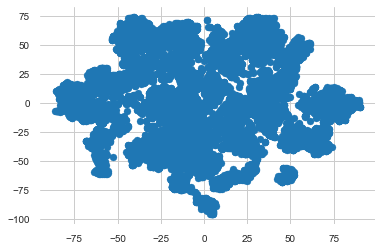

In [25]:
# whole
plt.scatter(*z.T)

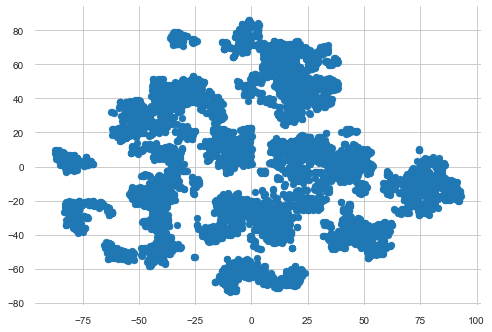

In [28]:
# train
plt.scatter(*z.T)

In [29]:
z.shape

(7436, 2)

In [26]:
projected_df = pd.DataFrame(z, columns=['project_0', 'project_1'])
projected_df = pd.concat([projected_df, whole_df], axis=1)

### Visualization using hue `target`

色分けして出してみましょう。自分で書いても良いですが `seaborn.scatterplot` が hue (特定の列での group ごとのプロット) に対応しているのでコード量を減らすことができます。

In [46]:
projected_df['6718e7f83c824b1e436d'] = projected_df.chip_id=='6718e7f83c824b1e436d'
projected_df['0b9dbf13f938efd5717f'] = projected_df.chip_id=='0b9dbf13f938efd5717f'
projected_df['84b788fdc5e779f8a0df'] = projected_df.chip_id=='84b788fdc5e779f8a0df'

In [42]:
projected_df.columns

Index(['project_0', 'project_1', 'beta', 'chip_id', 'exc_wl', 'layout_a',
       'layout_x', 'layout_y', 'params0', 'params1', 'params2', 'params3',
       'params4', 'params5', 'params6', 'pos_x', 'rms', 'spectrum_filename',
       'spectrum_id', 'target', 'is_train', 'label_3', 'label_10',
       '6718e7f83c824b1e436d', '0b9dbf13f938efd5717f'],
      dtype='object')

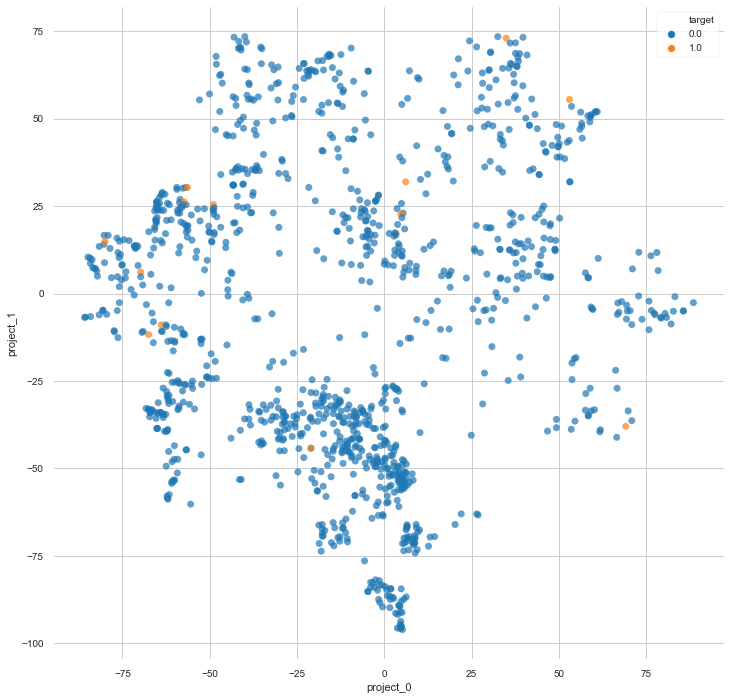

In [48]:
# whole
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(data=projected_df[projected_df['84b788fdc5e779f8a0df']], 
                x='project_0', y='project_1', 
                hue='target', ax=ax, edgecolors='none', linewidth=0, alpha=.7)

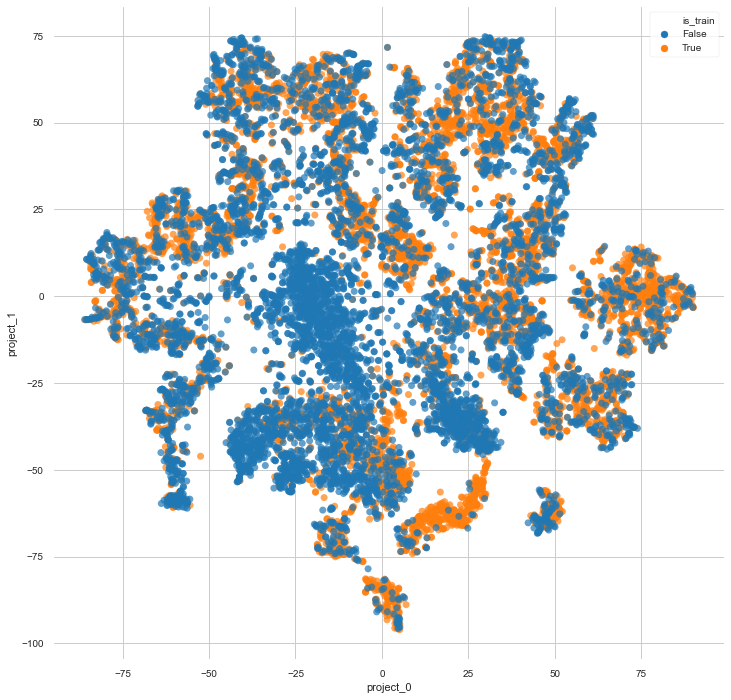

In [28]:
# whole
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(data=projected_df, 
                x='project_0', y='project_1', 
                hue='is_train', ax=ax, edgecolors='none', linewidth=0, alpha=.7)

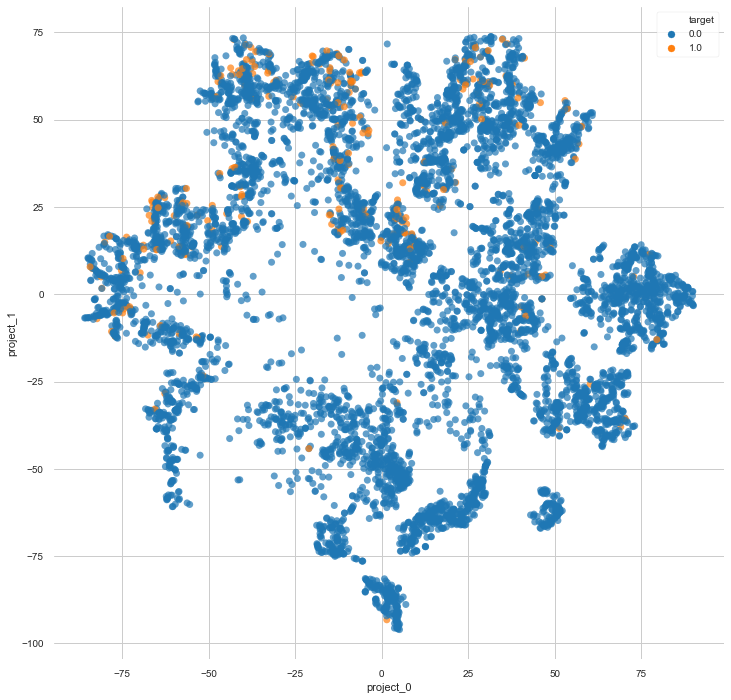

In [29]:
# whole
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(data=projected_df[projected_df.is_train], 
                x='project_0', y='project_1', 
                hue='target', ax=ax, edgecolors='none', linewidth=0, alpha=.7)

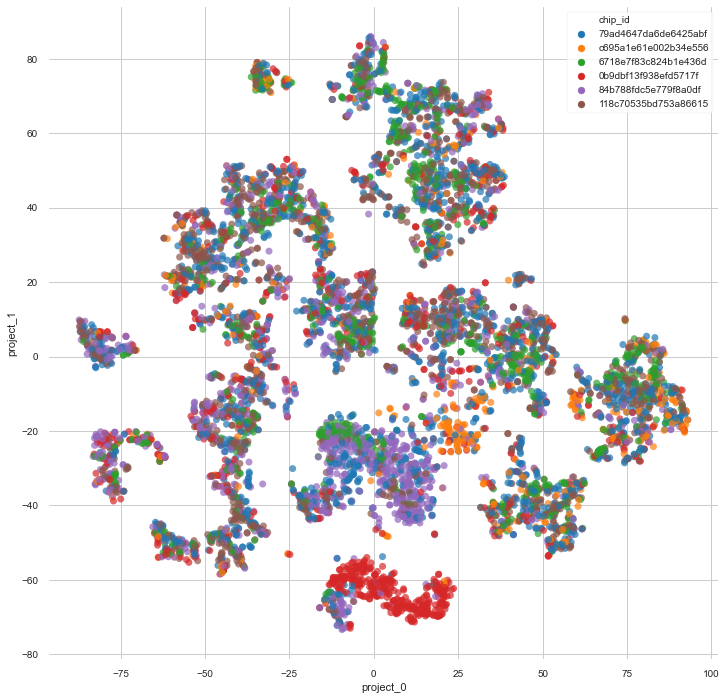

In [31]:
# train
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(data=projected_df, 
                x='project_0', y='project_1', 
                hue='chip_id', ax=ax, edgecolors='none', linewidth=0, alpha=.7)

このグラフを見てわかることを書くと以下のような感じでしょうか。

* ひとつだけまとまっている chip がある。この chip は他とは傾向が大きく異なりそう
* その他は紫のchipがまとまっているぐらいで、ほかは概ね似たような傾向。

これ以外にも hue に指定していろいろと傾向を探ると面白いと思います。

## 今関追記 クラスタリング

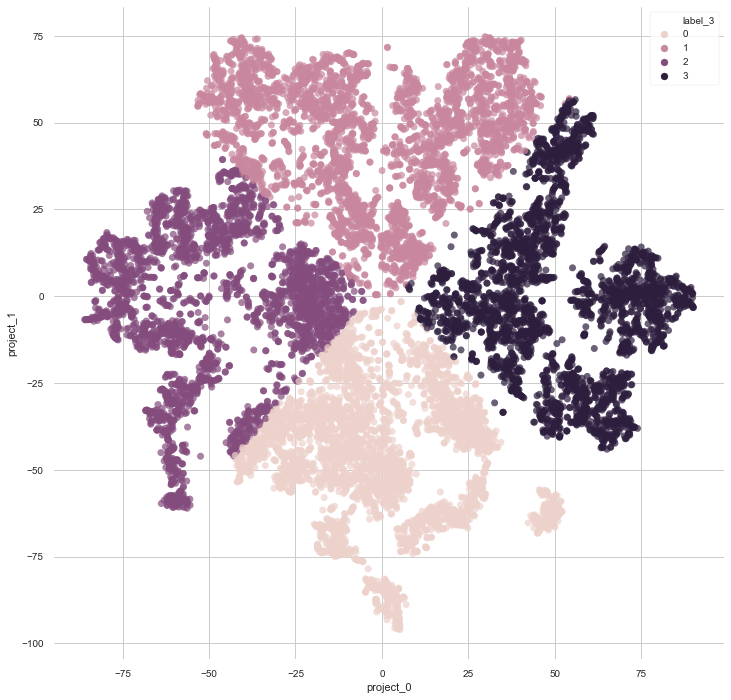

In [32]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=4, random_state=10).fit(projected_df[['project_0', 'project_1']])
projected_df['label_3'] = kmeans_model.labels_

# whole
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(data=projected_df, 
                x='project_0', y='project_1', 
                hue='label_3', ax=ax, edgecolors='none', linewidth=0, alpha=.7)

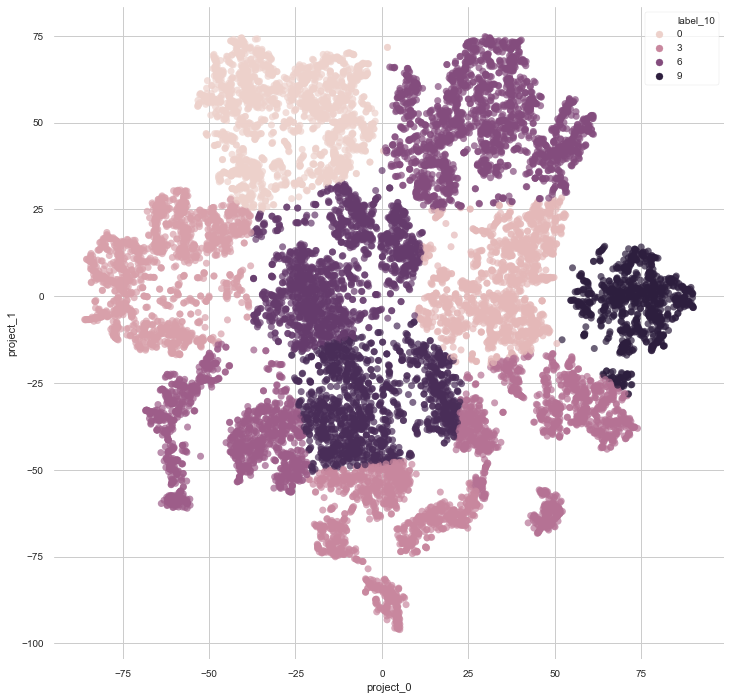

In [33]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=10, random_state=10).fit(projected_df[['project_0', 'project_1']])
projected_df['label_10'] = kmeans_model.labels_

# whole
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(data=projected_df, 
                x='project_0', y='project_1', 
                hue='label_10', ax=ax, edgecolors='none', linewidth=0, alpha=.7)

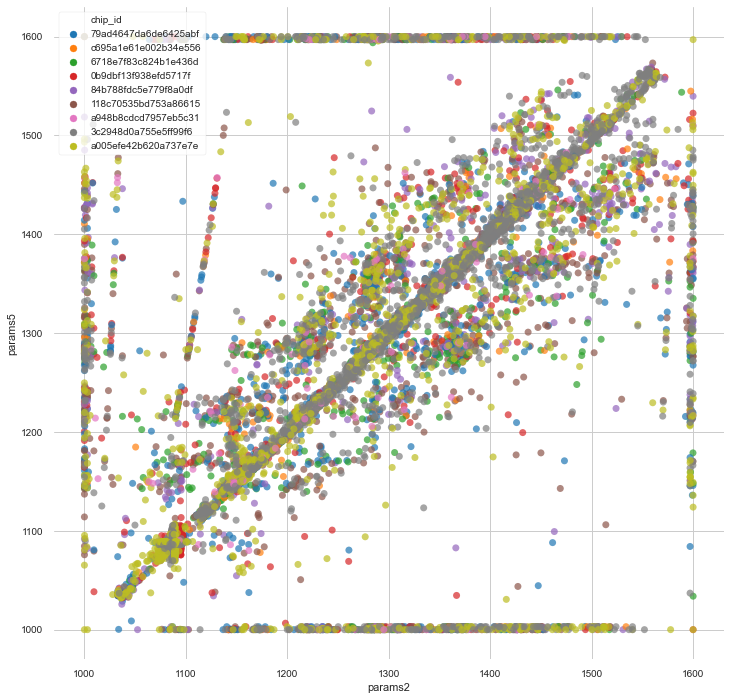

In [97]:
# 単純に気になっているやつ
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(data=projected_df, 
                x='params2', y='params5', 
                hue='chip_id', ax=ax, edgecolors='none', linewidth=0, alpha=.7)

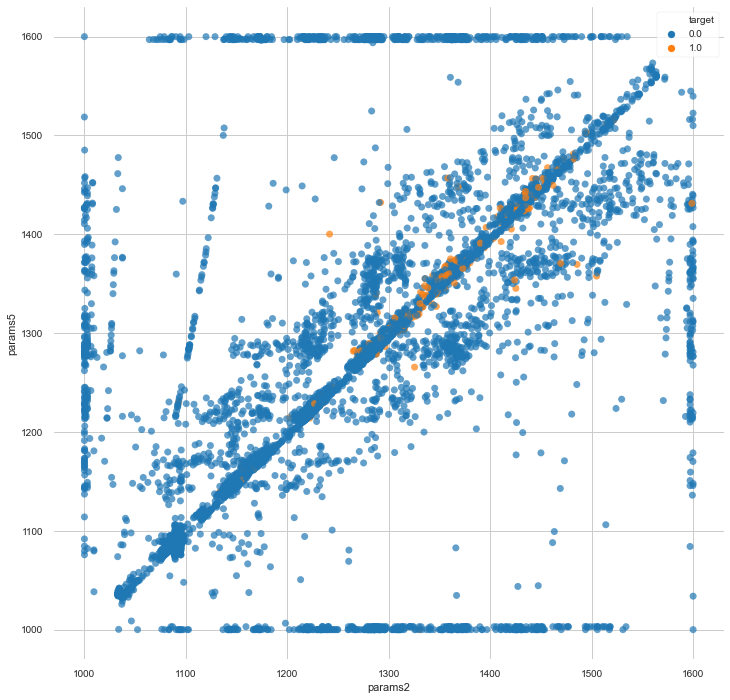

In [88]:
# 単純に気になっているやつ
# 比例関係の部分に正解が多い、というか比例関係になっていないところに正解はほぼない
# 単純にparams2-params5の絶対値で良さそう、傾きとかもありか
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(data=projected_df[projected_df.is_train], 
                x='params2', y='params5', 
                hue='target', ax=ax, edgecolors='none', linewidth=0, alpha=.7)

In [34]:
projected_df[['spectrum_id', 'project_0', 'project_1', 'label_3', 'label_10', 'is_train']].to_csv('../data/intermed/projected_df2.csv')

In [110]:
abs(projected_df['params2'] - projected_df['params5'])

0          5.397484
1          3.041597
2        259.418901
3          5.357782
4          3.810555
            ...    
14383      1.665940
14384      4.140200
14385     25.562158
14386      0.773133
14387      6.661620
Length: 14388, dtype: float64

## ↑ここまで

例えばフィッティングのパラメータ `params2` でやってみましょう

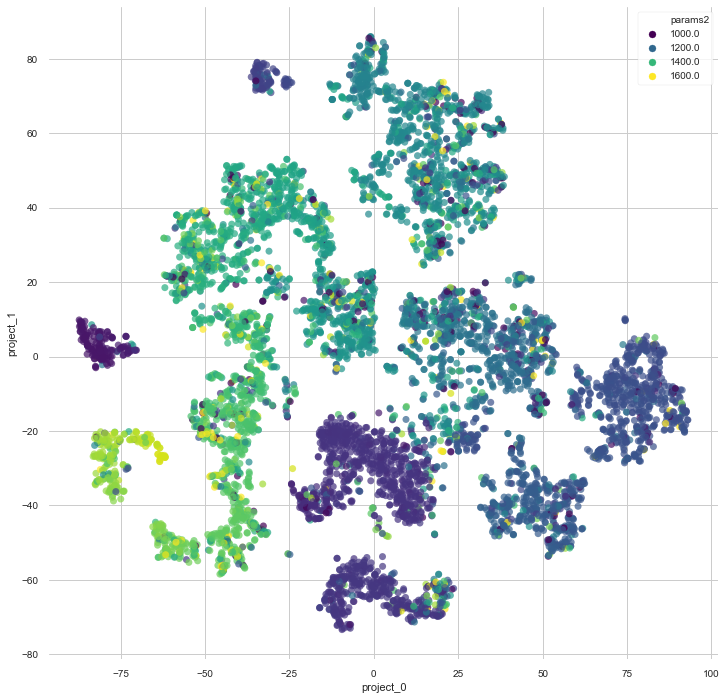

In [32]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(data=projected_df, x='project_0', y='project_1', hue='params2', ax=ax, edgecolors='none', linewidth=0, alpha=.7, palette='viridis')

見事に分かれていますね!! これは `fitting` の説明文にもあったように `params<0 ~ 6>` が波形を分析した結果であるからです。その方法に関しては明らかになっていませんが、とにかく何らか波形から1次元の数字になるような変換をしているので t-SNE でみたときに近いものは `params2` で見た時でも近い、ということです。

したがって自前 `params` みたいなものも作れそうです。たとえば以下のような流れでしょうか

1. t-SNE で低次元射影
2. 射影後の空間でクラスタリング (たとえば k-means / Gaussian Mixture) を行ってクラスタに分ける
3. 割り当てられたクラスタを特徴量とする

### おまけ

連続値を `hue` に指定すると外れ値があって色が意味をなさないケースがあります。たとえば `param3` は外れ地を含んでいるためそのままで指定すると一色になってしまいます。

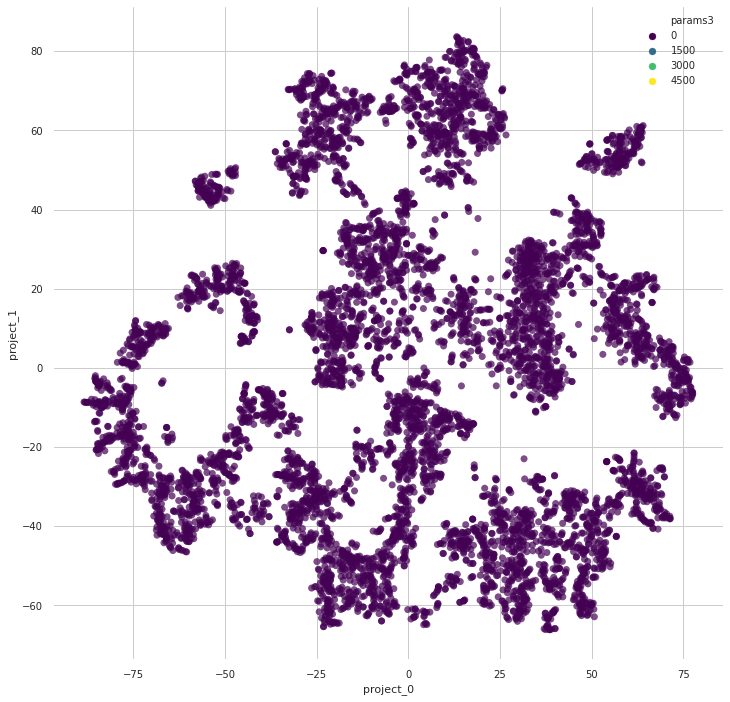

In [33]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(data=projected_df, x='project_0', y='project_1', hue='params3', ax=ax, edgecolors='none', linewidth=0, alpha=.7, palette='viridis')

こういう時は `pandas.qcut` を使って binning する処理を入れると良いです。`qcut` は与えられた配列を数値の大きさごとにカテゴライズしますが、そのとき各カテゴリに含まれるデータの数が同じになるような処理をしてくれます。

In [34]:
pd.qcut(projected_df['params3'], q=10)

0             (1.134, 2.0]
1           (4.718, 5.346]
2             (1.134, 2.0]
3           (4.718, 5.346]
4           (5.346, 5.807]
               ...        
7431        (3.604, 4.718]
7432        (0.499, 0.555]
7433          (1.134, 2.0]
7434    (12.769, 4303.512]
7435          (1.134, 2.0]
Name: params3, Length: 7436, dtype: category
Categories (10, interval[float64]): [(0.499, 0.555] < (0.555, 1.134] < (1.134, 2.0] < (2.0, 3.604] ... (5.346, 5.807] < (5.807, 10.423] < (10.423, 12.769] < (12.769, 4303.512]]

これの返り値はカテゴリ type の Series です。これを大小関係を保ったまま数値に直した時は `cat.codes` が早いです

In [35]:
pd.qcut(projected_df['params3'], q=10).cat.codes

0       2
1       5
2       2
3       5
4       6
       ..
7431    4
7432    0
7433    2
7434    9
7435    2
Length: 7436, dtype: int8

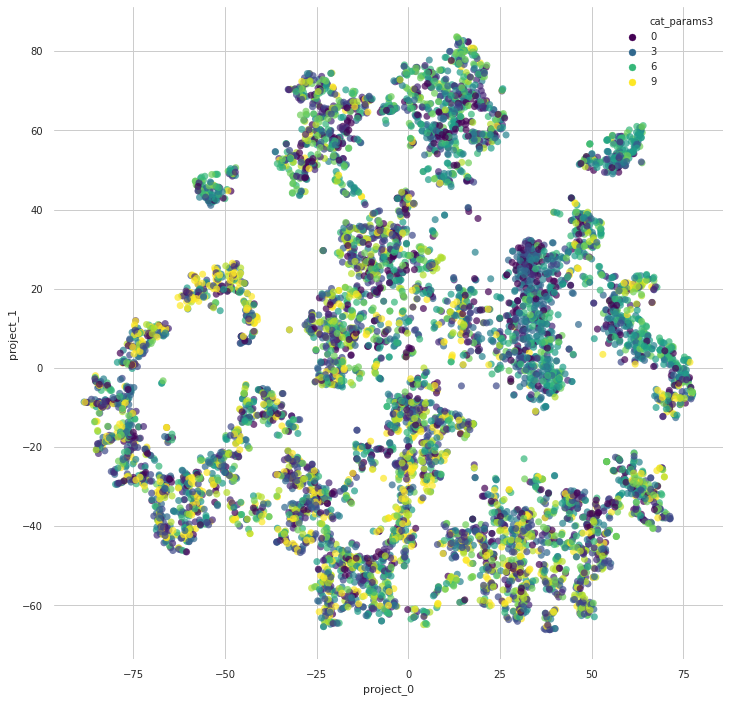

In [36]:
projected_df['cat_params3'] = pd.qcut(projected_df['params3'], q=10).cat.codes
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(data=projected_df, x='project_0', y='project_1', hue='cat_params3', ax=ax, edgecolors='none', linewidth=0, alpha=.7, palette='viridis')

### 注意

t-SNE はその原理上新しいデータに対して予測することができません!!
そのためテストデータに対して t-SNE での特徴ベクトルを使いたい場合にはテストデータの波形も一緒に `clf.fit` (or `fit_transform`) で渡してやる必要があります。

この notebook が動いた環境

In [37]:
!pip freeze

alembic==1.4.2
asn1crypto==1.3.0
astroid==2.3.3
astropy==4.0.1.post1
attr==0.3.1
attrs==19.3.0
autopep8==1.5.1
backcall==0.1.0
bleach==3.1.4
boto==2.49.0
boto3==1.12.39
botocore==1.15.39
catboost==0.22
certifi==2020.4.5.1
cffi==1.14.0
chardet==3.0.4
click==7.1.1
cliff==3.1.0
cloudpickle==1.4.1
cmaes==0.4.0
cmd2==0.8.9
colorlog==4.1.0
comet-git-pure==0.19.16
comet-ml==3.1.7
conda==4.8.3
conda-package-handling==1.6.0
configobj==5.0.6
confuse==1.0.0
cryptography==2.8
cycler==0.10.0
decorator==4.4.2
defusedxml==0.6.0
docutils==0.15.2
entrypoints==0.3
everett==1.0.2
feather-format==0.4.1
Flask==1.1.2
Flask-Cors==3.0.8
gensim==3.8.2
guruguru==0.1.1.1
htmlmin==0.1.12
idna==2.8
importlib-metadata==1.6.0
ipykernel==5.2.0
ipython==7.13.0
ipython-genutils==0.2.0
ipywidgets==7.5.1
isort==4.3.21
itsdangerous==1.1.0
jedi==0.16.0
Jinja2==2.11.1
jmespath==0.9.5
joblib==0.14.1
json5==0.9.4
jsonschema==3.0.2
jupyter==1.0.0
jupyter-client==6.1.2
jupyter-console==6.1.0
jupyter-contrib-core==0.3.3
jupyter-